In [4]:
import sys
import os
import numpy as np
import pandas as pd

# Add the src directory to the Python path

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
# Now you can import the TimeSeriesDataset class
from src.TimeSeriesDataset import TimeSeriesDataset as TSD
from src.utils import download_data
from src.mappings import value_mapping, ideology_mapping

In [2]:
# initialize dataset by downloading dataset or downloading the data from polity_url
dataset_10y = TSD(categories=['sc'], template_path="/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/MSP_template.csv")
# initialize the time array
dataset_10y.initialize_dataset_grid(-10000,2000,10)

Loaded template from /Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/MSP_template.csv
Downloaded 839 rows


KeyboardInterrupt: 

In [3]:
dataset_10y.download_all_categories()

In [4]:
for key in ideology_mapping['MSP'].keys():
    dataset_10y.add_column('ideo/'+key.lower())

In [5]:
# remove all rows that have less than 30% of the columns filled in
dataset_10y.remove_incomplete_rows(nan_threshold=0.3)
# build the social complexity variables
dataset_10y.build_social_complexity()
dataset_10y.build_MSP()

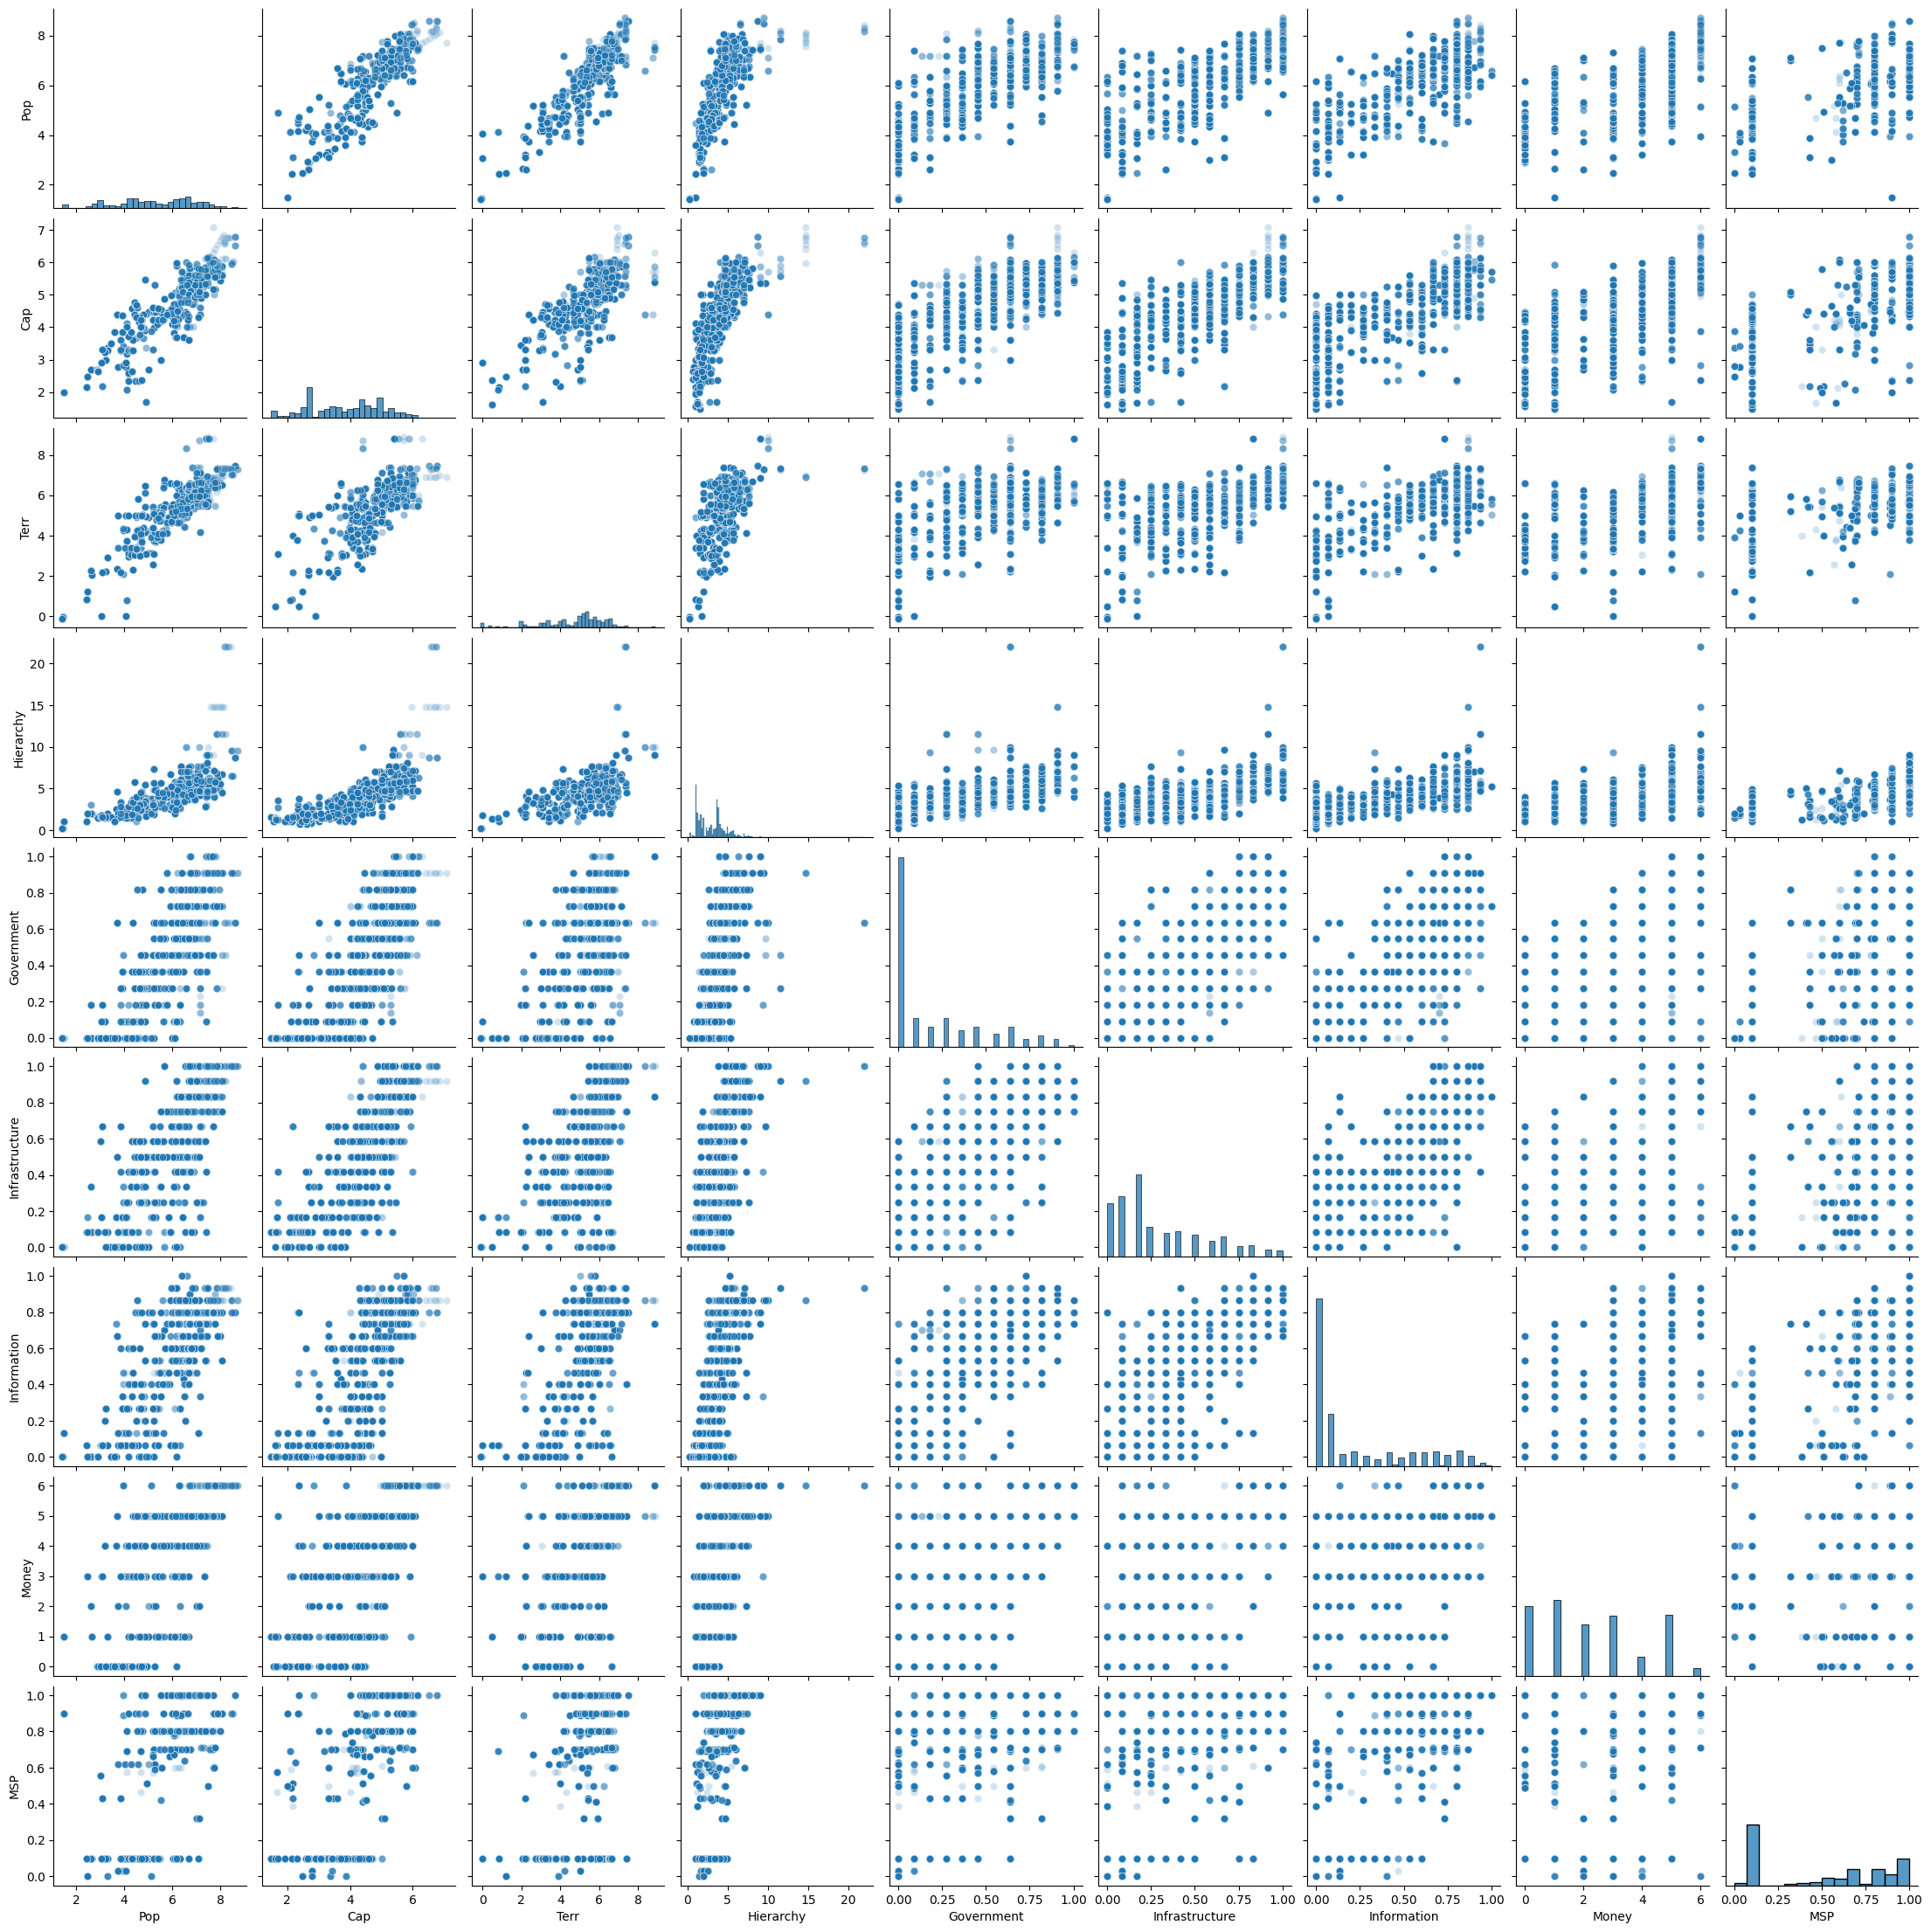

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money','MSP']
sns.pairplot(dataset_10y.scv[sc_columns], plot_kws={'alpha': 0.2})
plt.show()

In [7]:
# impute missing data
imp_columns =  ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
dataset_10y.impute_missing_values()
# dataset_10y.scv_imputed['MSP'].fillna(0, inplace=True) 

In [2]:
dataset_10y.save_dataset(path = '../datasets', name = '10_yr_dataset')

NameError: name 'dataset_10y' is not defined

In [5]:
dataset_10y = TSD(categories=['sc'], file_path="../datasets/10_yr_dataset.csv")

Dataset loaded from ../datasets/10_yr_dataset.xlsx


In [6]:
sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']

pca = dataset_10y.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8)

Explained variance by each PC:
PC1: 79.23%
PC2: 5.17%
PC3: 4.58%
PC4: 3.62%
PC5: 2.86%
PC6: 2.24%
PC7: 1.69%
PC8: 0.61%


In [7]:
dataset_PT = TSD(categories=['sc'], file_path='../datasets/power_transitions.xlsx')
dataset_PT.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8, pca_func=pca)

Dataset loaded from ../datasets/power_transitions.xlsx
Explained variance by each PC:
PC1: 79.23%
PC2: 5.17%
PC3: 4.58%
PC4: 3.62%
PC5: 2.86%
PC6: 2.24%
PC7: 1.69%
PC8: 0.61%


PCA(n_components=8)

In [5]:
scale_cols = ['Pop','Terr','Cap','Hierarchy']
scale_pca = dataset_10y.compute_PCA(cols = scale_cols, col_name = 'Scale', n_cols = 1, n_PCA= len(scale_cols))
dataset_PT.compute_PCA(cols = scale_cols, col_name = 'Scale', n_cols = 1, n_PCA= len(scale_cols), pca_func = scale_pca)

Explained variance by each PC:
PC1: 86.88%
PC2: 7.03%
PC3: 4.18%
PC4: 1.91%
Explained variance by each PC:
PC1: 86.88%
PC2: 7.03%
PC3: 4.18%
PC4: 1.91%


PCA(n_components=4)

In [8]:
print(dataset_10y.scv_imputed.MSP.notna().sum())
print(dataset_10y.scv_imputed.MSP.isna().sum())

print(dataset_PT.scv_imputed.MSP.notna().sum())
print(dataset_PT.scv_imputed.MSP.isna().sum())

7544
14169
1307
1435


In [7]:
dataset_10y.scv.dropna(subset=['MSP'], inplace=True)
dataset_PT.scv.dropna(subset=['MSP'], inplace=True)
dataset_10y.scv_imputed.dropna(subset=['MSP'], inplace=True)
dataset_PT.scv_imputed.dropna(subset=['MSP'], inplace=True)

In [8]:
inst_cols = ['Government', 'Infrastructure', 'Information', 'Money', 'MSP']
inst_pca = dataset_10y.compute_PCA(cols = inst_cols, col_name = 'Inst', n_cols = 1, n_PCA= len(inst_cols))
dataset_PT.compute_PCA(cols = inst_cols, col_name = 'Inst', n_cols = 1, n_PCA= len(inst_cols), pca_func = inst_pca)


Explained variance by each PC:
PC1: 78.35%
PC2: 7.44%
PC3: 6.93%
PC4: 4.37%
PC5: 2.91%
Explained variance by each PC:
PC1: 78.35%
PC2: 7.44%
PC3: 6.93%
PC4: 4.37%
PC5: 2.91%


PCA(n_components=5)

In [8]:
len(dataset_PT.raw)

2058

In [9]:
dataset_PT.save_dataset(path='../datasets/', name='power_transitions')
dataset_10y.save_dataset(path = '../datasets', name = '10_yr_dataset')

Dataset saved to ../datasets/power_transitions.xlsx
Dataset saved to ../datasets/10_yr_dataset.xlsx


In [17]:
succ_df = download_data('http://51.141.239.61:8000/api/general/polity-succeeding-entities/')
polity_df = download_data('http://51.141.239.61:8000/api/core/polities/')
succeeding_df = succ_df[['succeeding_entity']]

Downloaded 458 rows
Downloaded 828 rows


In [18]:
succeeding_df['succeeding_polity_name'] = succeeding_df.succeeding_entity.apply(lambda x: polity_df[polity_df.long_name == x].iloc[0].new_name if len(polity_df[polity_df.long_name == x]) > 0 else np.nan)
succeeding_df['PolityName'] = succ_df.polity_new_name
succeeding_df['StartYear'] = succ_df.polity_start_year


/var/folders/c3/82t48qlj2bg0xttc4k7vx70r0000gq/T/ipykernel_51759/1253281715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  succeeding_df['succeeding_polity_name'] = succeeding_df.succeeding_entity.apply(lambda x: polity_df[polity_df.long_name == x].iloc[0].new_name if len(polity_df[polity_df.long_name == x]) > 0 else np.nan)
/var/folders/c3/82t48qlj2bg0xttc4k7vx70r0000gq/T/ipykernel_51759/1253281715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  succeeding_df['PolityName'] = succ_df.polity_new_nam

In [19]:
succeeding_df.succeeding_polity_name.isna().sum()

241